In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
#trajectory3: delta = .40
#trajectory1: delta = .05 
#trajectory2: delta= .05, tau=5
#trajectory_Ldist_tau500_phi01_eps01
traj = np.load('trajs/trajectory3') #  trajectory_Ldist_tau5_phi01_eps01_fully
delta=20
tau=7

N=100

        


In [2]:
size = len(traj.index)
S = np.zeros(shape=(size, N))
K = np.zeros(shape=(size, N))
C = np.zeros(shape=(size, N))
w = np.zeros(shape=(size, 1))
r = np.zeros(shape=(size,1))
L = traj['P'][0]
y = np.zeros(shape=(size,1))
idx = traj.index[0:size]
for a, t in enumerate(traj.index[0:size]):
    S[a,:] = traj['s'][t]
    C[a,:] = traj['C'][t]
    K[a,:] = traj['capital'][t]
    w[a,:] = traj['wage'][t]
    r[a,:] = traj['r'][t]
    y[a,:] = traj['Y'][t]
del traj

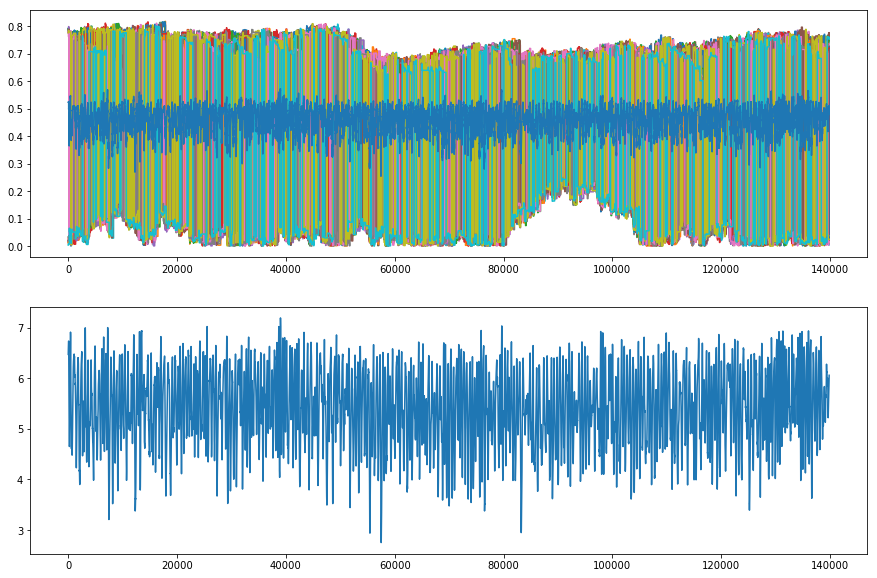

In [50]:
start, stop = 60000, 400000

fig, (ax1,ax2) = plt.subplots(2,figsize=(15,10))
ax1.plot(S[start:stop,:20])
sincome = S[start:stop,:]* (r[start:stop] * K[start:stop,:] +\
                            w[start:stop] *L[:])

income = (r[start:stop] * K[start:stop,:] +\
                            w[start:stop] *L[:])
ax1.plot( sincome.sum(1)/income.sum(1))
ax2.plot( K[start:stop,:].sum(1))

#ax1.set_xscale('log')
fig.savefig('long_trend_tau15.pdf')

In [12]:
# get avg time spent in high saving state
plt.rc('font', size=20)  

times=[]
sold=999
delt=0
start,stop = 20000,100000
tau = 10.
thresh = 0.5

if False:
    for agent in range(100):
        tstart=start
        for t in range(start,stop):
            if sold != (S[t,agent] >thresh):
                if (S[t,agent] >thresh):
                    times.append( idx[t] - idx[tstart])
                tstart = t
                sold = (S[t,agent] >thresh)
    yy=np.array(times)/tau
else:
    for agent in range(100):
        tstart=start
        for t in range(start,stop):
            if sold != (S[t,agent] <thresh):
                if (S[t,agent] <thresh):
                    times.append( idx[t] - idx[tstart])
                tstart = t
                sold = (S[t,agent] <thresh)
    yy=np.array(times)/tau  




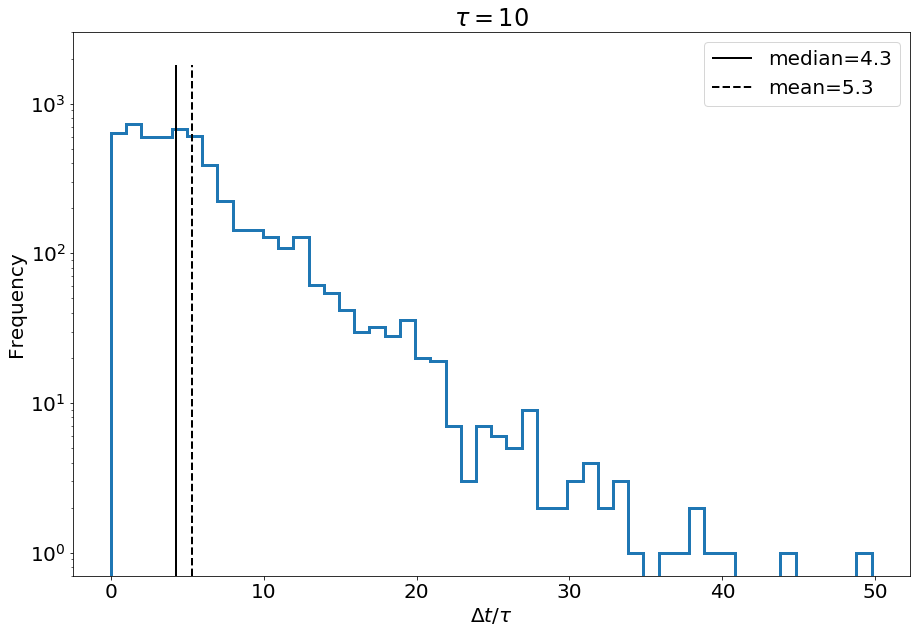

In [13]:
fig2=plt.figure(figsize=(15,10))
ax=fig2.add_subplot(111)
ax.hist(yy,bins=50,histtype='step',log=True,linewidth=3)    
ax.vlines(np.median(yy),0.7,10**3+800, 'k',label='median=%s'%np.round(np.median(yy),1),lw=2)
ax.vlines(yy.mean(),0.7,10**3+800, color='k',linestyle='--',label='mean=%s'%np.round(yy.mean(),1),lw=2)
ax.legend(loc='upper right')
ax.set_xlabel(r'$\Delta t /\tau$')
ax.set_ylabel(r'Frequency')
ax.set_ylim(ymin=0.7,ymax=3000)
ax.set_title(r'$\tau=%s$'%int(tau))
#ax.set_xscale('log')
#fig2.savefig('high_times_tau%s_start%s_stop%s.pdf'%(tau,start,stop))

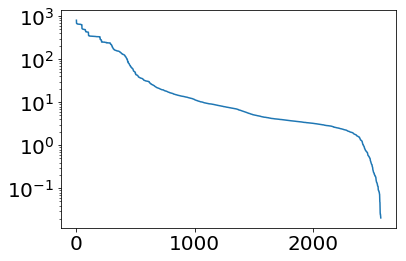

In [25]:
plt.semilogy(np.sort(yy)[::-1]) # exponential? some have very high remain times.

In [3]:
from pymofa.experiment_handling import even_time_series_spacing
df = pd.DataFrame(K, index= idx)
print df
dfk = even_time_series_spacing(df,2000*tau)

                    0         1         2         3         4         5   \
time                                                                       
0.000000      1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
0.611478      0.811314  0.797125  0.806847  0.814937  0.778418  0.781721   
2.806310      0.290018  0.238223  0.273594  0.303413  0.171590  0.183217   
3.962759      0.214885  0.167090  0.199395  0.227745  0.110230  0.119769   
7.519377      0.087886  0.040433  0.071242  0.102590  0.000035  0.005502   
8.865297      0.082995  0.037385  0.066327  0.098251  0.004267  0.008340   
9.097267      0.082309  0.037001  0.065658  0.097631  0.004711  0.008649   
10.095547     0.079516  0.035431  0.062925  0.095124  0.006483  0.009879   
11.463276     0.076433  0.033731  0.059900  0.092425  0.008171  0.011067   
11.701169     0.076022  0.033517  0.059499  0.092071  0.008345  0.011192   
11.754502     0.075933  0.033472  0.059413  0.091995  0.008381  0.011218   
12.054351   

/home/yuki/anaconda2/envs/env_full2/lib/python2.7/site-packages/scipy/interpolate/interpolate.py:634: RuntimeWarning: invalid value encountered in less
  below_bounds = x_new < self.x[0]
/home/yuki/anaconda2/envs/env_full2/lib/python2.7/site-packages/scipy/interpolate/interpolate.py:635: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


0.53066797302 0.142539531091


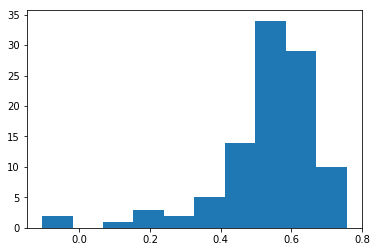

In [17]:
corrs=[]
#start, stop = 0, 2000*30
for agent in range(100):
    x = dfk[agent].values[:-1] # K[start:stop,agent]
    t = 30 #300
    corrs.append(np.corrcoef(np.array([x[0:len(x)-t], x[t:len(x)]]))[0,1])
plt.hist(corrs)
print np.mean(corrs), np.std(corrs) 
# tau10 0.5042 , 0.1595 
# tau15 0.6460, 0.1229 
# tau9 0.5505 , 0.148 
# tau7 0.3856 0.175


In [58]:
dfk[agent].values

array([  1.00000000e+00,   8.47432250e-01,   7.18726896e-01, ...,
         7.93060657e-04,   7.94843940e-04,              nan])

array([ 1.        ,  0.83185469,  0.69280375, ...,  0.06927038,
        0.05674267,         nan])